In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# tensorflow
import tensorflow as tf

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

import warnings

# Dataset

In [ ]:
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')

df = pd.read_csv('https://raw.githubusercontent.com/gemparpanggih/Beras_Kaltim/main/beras_kaltim.csv', parse_dates=["Komoditas(Rp)"],
                 date_parser=dateparse,
                 index_col=["Komoditas(Rp)"])
#Ubah nama index
df.index.names = ['Date']

df.head()

,Beras,Beras Kualitas Bawah I (kg),Beras Kualitas Bawah II (kg),Beras Kualitas Medium I (kg),Beras Kualitas Medium II (kg),Beras Kualitas Super I (kg),Beras Kualitas Super II (kg)
Date,,,,,,,
2021-01-04,12350,10850,10700,12650,12400,13950,13400
2021-01-05,12350,10850,10700,12650,12400,13950,13400
2021-01-06,12350,10850,10700,12650,12400,13950,13400
2021-01-07,12350,10850,10700,12650,12400,13950,13400
2021-01-08,12350,10850,10700,12650,12400,13950,13400


In [ ]:
df.describe()

,Beras,Beras Kualitas Bawah I (kg),Beras Kualitas Bawah II (kg),Beras Kualitas Medium I (kg),Beras Kualitas Medium II (kg),Beras Kualitas Super I (kg),Beras Kualitas Super II (kg)
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,12309.906760,10957.575758,10881.002331,12515.734266,12431.934732,13812.470862,13203.496503
std,146.735475,269.812495,206.679743,198.218077,157.762496,141.014191,551.706688
min,12050.000000,10500.000000,10650.000000,11400.000000,12150.000000,13500.000000,12650.000000
25%,12150.000000,10750.000000,10750.000000,12350.000000,12250.000000,13650.000000,13000.000000
50%,12350.000000,10850.000000,10750.000000,12550.000000,12450.000000,13850.000000,13100.000000
75%,12350.000000,11100.000000,11100.000000,12650.000000,12500.000000,13950.000000,13500.000000
max,14050.000000,11600.000000,11400.000000,12850.000000,12950.000000,14050.000000,23650.000000


In [ ]:
df_resample_month = df.resample('M').mean()

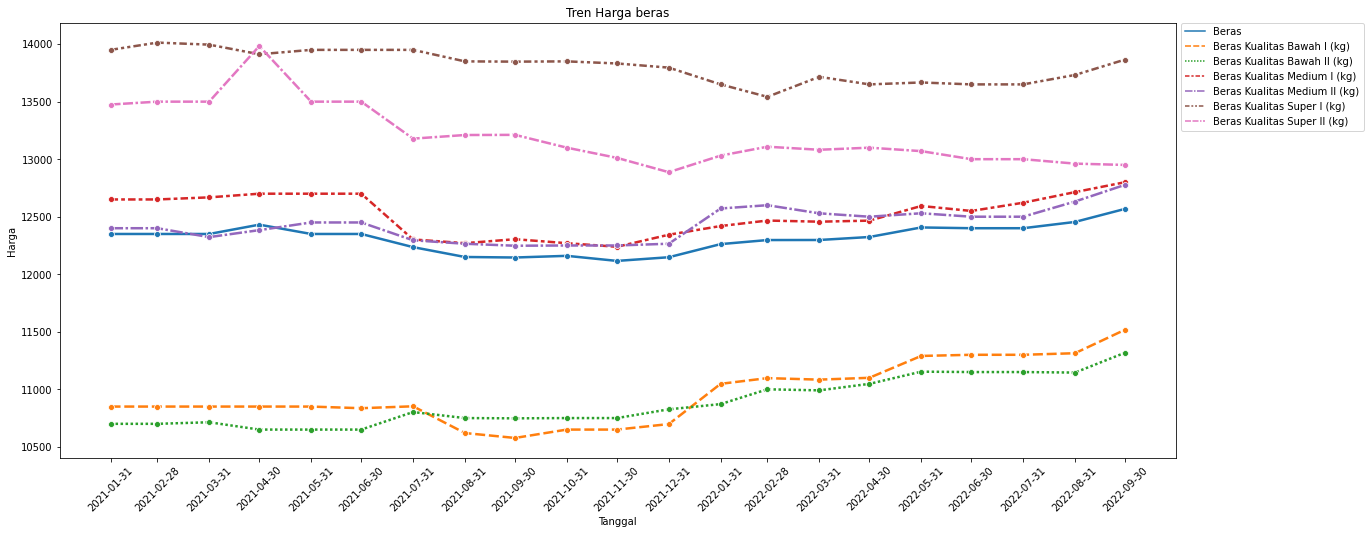

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=df_resample_month, linewidth=2.5, marker="o")
ax.set(xlabel='Tanggal', ylabel='Harga', title='Tren Harga beras', xticks=df_resample_month.index)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

### Train Test Split

In [ ]:
train, test = train_test_split(df, test_size=.25, shuffle = False, stratify = None)
print("train: ", len(train))
print("test: ", len(test))

train:  321
test:  108


In [ ]:
train_beras = train[['Beras']]
test_beras = test[['Beras']]
test_beras_2 = test[['Beras']]

train_beras_kualitas_bawah_1 = train[['Beras Kualitas Bawah I (kg)']]
test_beras_kualitas_bawah_1 = test[['Beras Kualitas Bawah I (kg)']]

train_beras_kualitas_bawah_2 = train[['Beras Kualitas Bawah II (kg)']]
test_beras_kualitas_bawah_2 = test[['Beras Kualitas Bawah II (kg)']]

train_beras_kualitas_medium_1 = train[['Beras Kualitas Bawah I (kg)']]
test_beras_kualitas_medium_1 = test[['Beras Kualitas Bawah I (kg)']]

train_beras_kualitas_medium_2 = train[['Beras Kualitas Medium II (kg)']]
test_beras_kualitas_medium_2 = test[['Beras Kualitas Medium II (kg)']]

train_beras_kualitas_super_1 = train[['Beras Kualitas Super I (kg)']]
test_beras_kualitas_super_1 = test[['Beras Kualitas Super I (kg)']]

train_beras_kualitas_super_2 = train[['Beras Kualitas Super II (kg)']]
test_beras_kualitas_super_2 = test[['Beras Kualitas Super II (kg)']]



### Standarisasi

In [ ]:
scaler = MinMaxScaler()

scaled_train_beras = scaler.fit_transform(train_beras)
scaled_test_beras = scaler.fit_transform(test_beras) 

scaled_train_beras_kualitas_bawah_1 = scaler.fit_transform(train_beras_kualitas_bawah_1)
scaled_test_beras_kualitas_bawah_1 = scaler.fit_transform(test_beras_kualitas_bawah_1)

scaled_train_beras_kualitas_bawah_2 = scaler.fit_transform(train_beras_kualitas_bawah_2)
scaled_test_beras_kualitas_bawah_2 = scaler.fit_transform(test_beras_kualitas_bawah_2)

scaled_train_beras_kualitas_medium_1 = scaler.fit_transform(train_beras_kualitas_medium_1)
scaled_test_beras_kualitas_medium_1 = scaler.fit_transform(test_beras_kualitas_medium_1)

scaled_train_beras_kualitas_medium_2 = scaler.fit_transform(train_beras_kualitas_medium_2)
scaled_test_beras_kualitas_medium_2 = scaler.fit_transform(test_beras_kualitas_medium_2)

scaled_train_beras_kualitas_super_1 = scaler.fit_transform(train_beras_kualitas_super_1)
scaled_test_beras_kualitas_super_1 = scaler.fit_transform(test_beras_kualitas_super_1)

scaled_train_beras_kualitas_super_2 = scaler.fit_transform(train_beras_kualitas_super_2)
scaled_test_beras_kualitas_super_2 = scaler.fit_transform(test_beras_kualitas_super_2)

# Model

### Time Series Generator



In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

scaled_train = scaled_train_beras[:,0]
scaled_test = scaled_test_beras[:,0]

generator = TimeseriesGenerator(scaled_train, scaled_train, length=30, batch_size=8)

### Callback Function untuk earlystop

In [ ]:
monitor_loss_callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

## Percobaan training



 ### Testing untuk mencari Jumlah layer & unit layer terbaik

#### Add Layer

In [ ]:
model_test_1 = tf.keras.models.Sequential()
model_test_1.add(tf.keras.layers.Dense(units=1, activation='relu'))
model_test_1.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_test_1.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_test_1.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_test_1.add(tf.keras.layers.Dense(units=1))
model_test_1.compile(loss='mean_absolute_error', optimizer='adam')
model_test_2 = tf.keras.models.Sequential()
model_test_2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model_test_2.add(tf.keras.layers.Dense(units=256, activation='sigmoid'))
model_test_2.add(tf.keras.layers.Dense(units=256, activation='sigmoid'))
model_test_2.add(tf.keras.layers.Dense(units=256, activation='sigmoid'))
model_test_2.add(tf.keras.layers.Dense(units=1))
model_test_2.compile(loss='mean_absolute_error', optimizer='adam')
model_test_3 = tf.keras.models.Sequential()
model_test_3.add(tf.keras.layers.Dense(units=1, activation='relu'))
model_test_3.add(tf.keras.layers.Dense(units=512, activation='relu'))
model_test_3.add(tf.keras.layers.Dense(units=512, activation='relu'))
model_test_3.add(tf.keras.layers.Dense(units=512, activation='relu'))
model_test_3.add(tf.keras.layers.Dense(units=1))
model_test_3.compile(loss='mean_absolute_error', optimizer='adam')
model_test_4 = tf.keras.models.Sequential()
model_test_4.add(tf.keras.layers.Dense(units=1, activation='relu'))
model_test_4.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model_test_4.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model_test_4.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model_test_4.add(tf.keras.layers.Dense(units=1))
model_test_4.compile(loss='mean_absolute_error', optimizer='adam')

  #### Training Model 

In [ ]:
#Latih Model
model_test_1.fit(generator, epochs=100, batch_size=32, callbacks=monitor_loss_callbacks)
model_test_2.fit(generator, epochs=100, batch_size=32, callbacks=monitor_loss_callbacks)
model_test_3.fit(generator, epochs=100, batch_size=32, callbacks=monitor_loss_callbacks)
model_test_4.fit(generator, epochs=100, batch_size=32, callbacks=monitor_loss_callbacks)

Epoch 1/100
37/37 [==============================] - 1s 3ms/step - loss: 0.0488
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0407
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0362
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0308
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0232
Epoch 10/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0212
Epoch 11/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 12/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0207
Epoch 13/100
37/37 [=================

#### Visualisasi prediksi 30 Hari terakhir untuk mengevaluasi model

In [ ]:
def predict_last_30days(model):
  test_pred = []
  first_eval_batch = scaled_train_beras[-30:]
  cur_batch = first_eval_batch.reshape(1,30,1)

  for i in range(len(scaled_test_beras)):
      #Dapatkan Prediksi dari nilai pertama untuk tiap batch
      current_pred = model.predict(cur_batch)[0]

      #Append hasil prediksi ke array
      test_pred.append(current_pred)

      #Update nilai tiap batch
      cur_batch = np.append(
          cur_batch[:,1:,:],
          [[current_pred]],
          axis=1
          )
      
  return test_pred;

arr_pred_model_1 = predict_last_30days(model_test_1)
arr_pred_model_2 = predict_last_30days(model_test_2)
arr_pred_model_3 = predict_last_30days(model_test_3)
arr_pred_model_4 = predict_last_30days(model_test_4)

1/1 [==============================] - 0s 16ms/step


In [ ]:
prediction_model_1 = scaler.inverse_transform(arr_pred_model_1)
prediction_model_2 = scaler.inverse_transform(arr_pred_model_2)
prediction_model_3 = scaler.inverse_transform(arr_pred_model_3)
prediction_model_4 = scaler.inverse_transform(arr_pred_model_4)
test_beras_2["Prediksi Model 1"] = prediction_model_1
test_beras_2["Prediksi Model 2"] = prediction_model_2
test_beras_2["Prediksi Model 3"] = prediction_model_3
test_beras_2["Prediksi Model 4"] = prediction_model_4

test_beras_2.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Beras,Prediksi Model 1,Prediksi Model 2,Prediksi Model 3,Prediksi Model 4
Date,,,,,
2022-09-26,12550,12890.303707,12894.247605,12888.830858,12880.284768
2022-09-27,12550,12890.303439,12894.247605,12888.830925,12880.284563
2022-09-28,12550,12890.310398,12894.247605,12888.830932,12880.284164
2022-09-29,12550,12890.310930,12894.247605,12888.830943,12880.284004
2022-09-30,12550,12890.309686,12894.247605,12888.830992,12880.283984


In [ ]:
test_beras_2_M = test_beras_2.resample('M').mean()

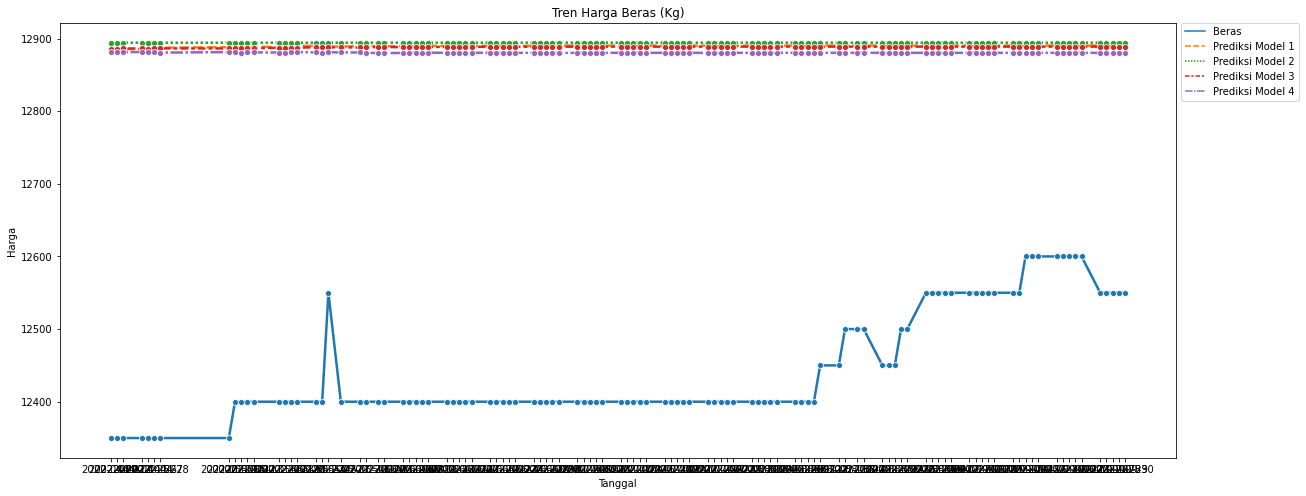

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=test_beras_2, linewidth=2.5, marker="o", linestyle='solid')
ax.set(xlabel='Tanggal', ylabel='Harga', title='Tren Harga Beras (Kg)', xticks=test_beras_2.index)
ax.legend(title='Beras', title_fontsize = 13)
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

## Training Model

### Add Layer

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1, activation='relu'))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))
model.compile(loss='mean_absolute_error', optimizer='adam')

### Fit Model

In [ ]:
#Latih Model
model.fit(generator, epochs=100, batch_size=32, callbacks=monitor_loss_callbacks)

Epoch 1/100
37/37 [==============================] - 1s 3ms/step - loss: 0.0572
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0443
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0419
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0323
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0356
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0305
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0286
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 10/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 11/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 12/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0232
Epoch 13/100
37/37 [=================

#### Visualisasi Loss setiap epoch ketika training

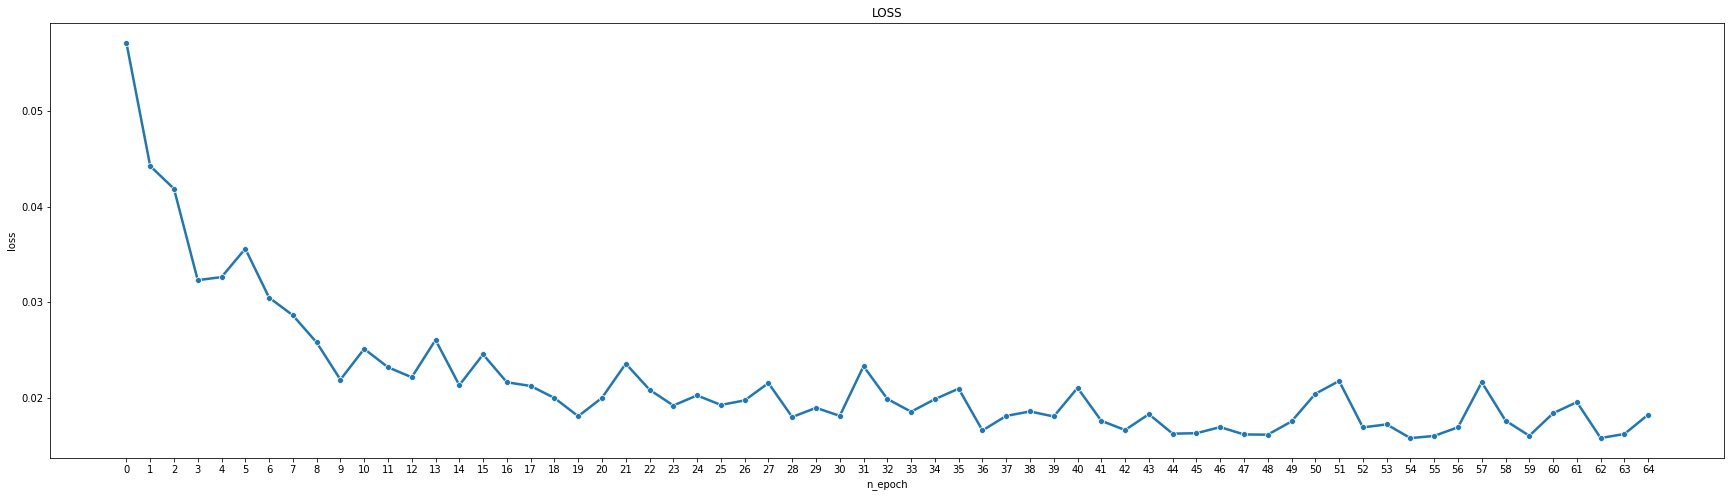

In [ ]:
loss_per_epoch = model.history.history["loss"]
n_epoch = list(range(len(loss_per_epoch)))

plt.figure(figsize=(30, 8))
sns.lineplot(data=loss_per_epoch, linewidth=2.5, marker="o", linestyle='solid').set(xlabel='n_epoch', ylabel='loss', title='LOSS', xticks=n_epoch)
plt.show()

# Test Predict

### Test Model dengan memprediksi satu hari kedepan

In [ ]:
last_line_train_beras = scaled_train_beras[-30:]
last_line_train_beras = last_line_train_beras.reshape(1,30,1)
model_pred = model.predict(last_line_train_beras)

print(model_pred)

1/1 [==============================] - 0s 52ms/step
[[0.13912798]]


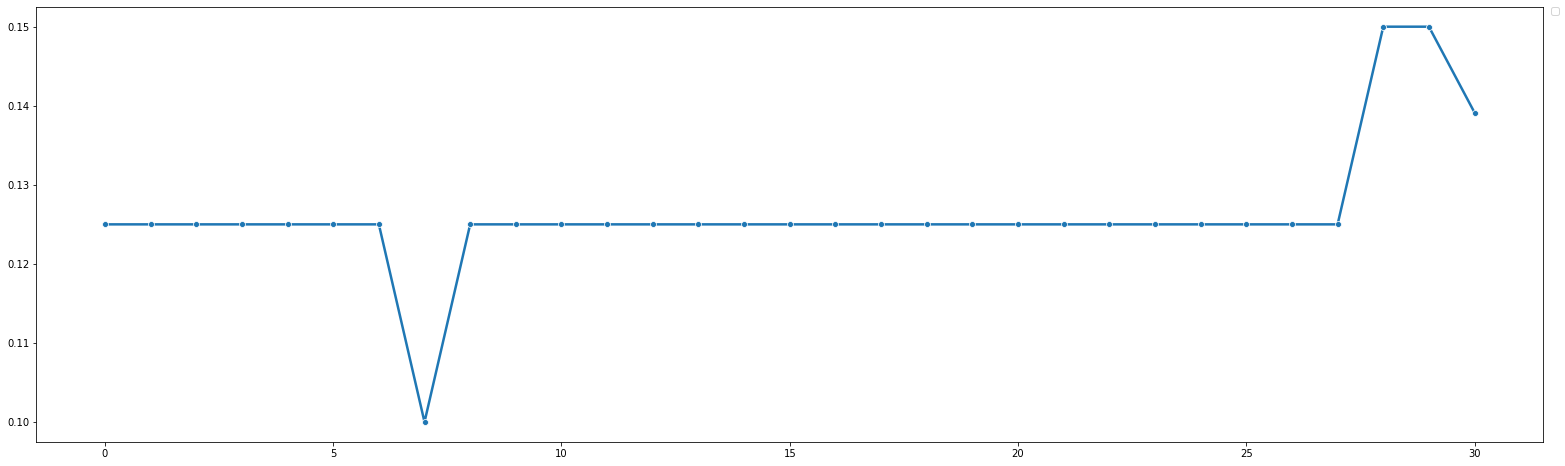

In [ ]:
data = scaled_train_beras[-30:]
data = np.append(data, model_pred)
plt.figure(figsize=(27, 8))
ax = sns.lineplot(data=data, linewidth=2.5, marker="o", linestyle='solid')
ax.legend(title='Beras', title_fontsize = 13)
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

### Test Model dengan memprediksi 30 hari terakhir lalu divalidasi oleh test_beras

In [ ]:
test_pred_beras = []

first_eval_batch = scaled_train_beras[-30:]
cur_batch = first_eval_batch.reshape(1,30,1)

for i in range(30):
    #Prediksi dari nilai pertama
    current_pred = model.predict(cur_batch)[0]

    # Append hasil prediksi
    test_pred_beras.append(current_pred)

    # Perbarui nilai batch dengan menghapus nilai index pertama dari batch
    cur_batch = np.append(
        cur_batch[:,1:,:],
        [[current_pred]],
        axis=1
        )

1/1 [==============================] - 0s 15ms/step


In [ ]:
temp_df_beras_sep = test_beras[-30:]
prediction = scaler.inverse_transform(test_pred_beras)
temp_df_beras_sep["Prediksi Beras"] = prediction
temp_df_beras_sep

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Beras,Prediksi Beras
Date,,
2022-08-22,12450,12884.781996
2022-08-23,12450,12883.694223
2022-08-24,12450,12885.375282
2022-08-25,12500,12886.001142
2022-08-26,12500,12885.884809
2022-08-29,12550,12885.210133
2022-08-30,12550,12885.100121
2022-08-31,12550,12885.896666
2022-09-01,12550,12886.605913


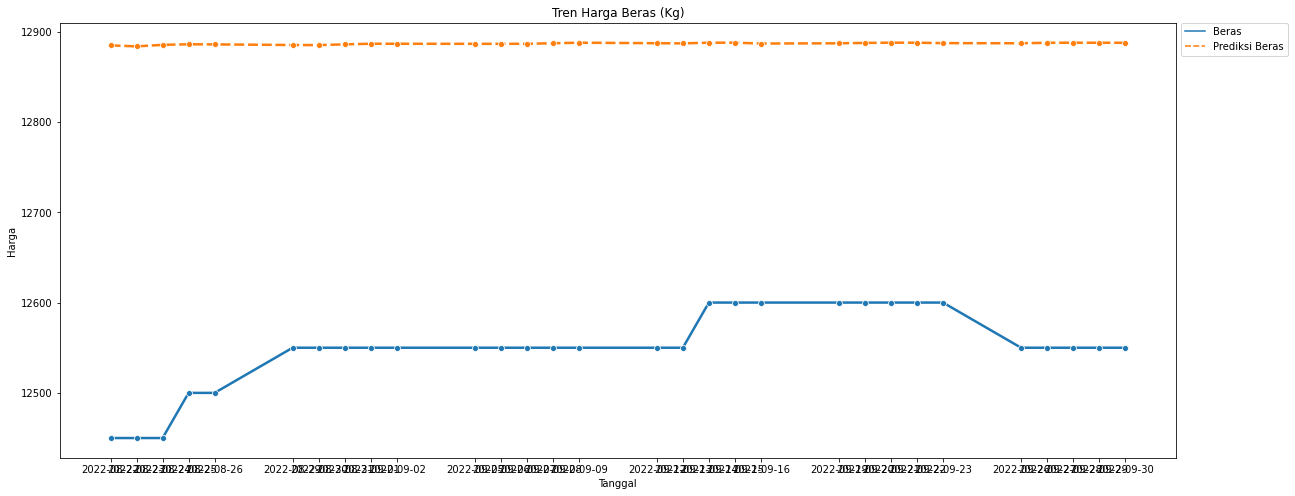

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=temp_df_beras_sep, linewidth=2.5, marker="o", linestyle='solid')
ax.set(xlabel='Tanggal', ylabel='Harga', title='Tren Harga Beras (Kg)', xticks=temp_df_beras_sep.index)
ax.legend(title='Beras', title_fontsize = 13)
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

### Prediksi Beras untuk 30 hari kedepan

In [ ]:
#Ambil 30 data terakhir
forecast_beras = test_beras.iloc[-30:,0]

In [ ]:
#Lakukan Scaling
scaled_forecast_beras = scaler.fit_transform(forecast_beras.values.reshape(-1,1))

In [ ]:
#Lakukan prediksi
test_pred_forecast = []

first_eval_batch = scaled_forecast_beras[-30:]
cur_batch = first_eval_batch.reshape(1,30,1)


for i in range(30):
    #Dapatkan Prediksi dari nilai pertama untuk tiap batch
    current_pred = model.predict(cur_batch)[0]

    #Append hasil prediksi ke array
    test_pred_forecast.append(current_pred)

    #Update nilai tiap batch
    cur_batch = np.append(cur_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [ ]:
prediction_forecast = scaler.inverse_transform(test_pred_forecast)
prediction_forecast = prediction_forecast.flatten()

In [ ]:
#Buat DataFrame Baru
date = pd.date_range(start='2022-10-01', periods=30)

temp_df = pd.DataFrame({
    "Prediksi Beras" : prediction_forecast
}, index=date)


#Gabungkan Data
df_pred = pd.concat([test_beras,temp_df])

df_pred

,Beras,Prediksi Beras
2022-04-20,12350.0,NaN
2022-04-21,12350.0,NaN
2022-04-22,12350.0,NaN
2022-04-25,12350.0,NaN
2022-04-26,12350.0,NaN
...,...,...
2022-10-26,NaN,12458.149260
2022-10-27,NaN,12467.542583
2022-10-28,NaN,12471.937861
2022-10-29,NaN,12468.617157


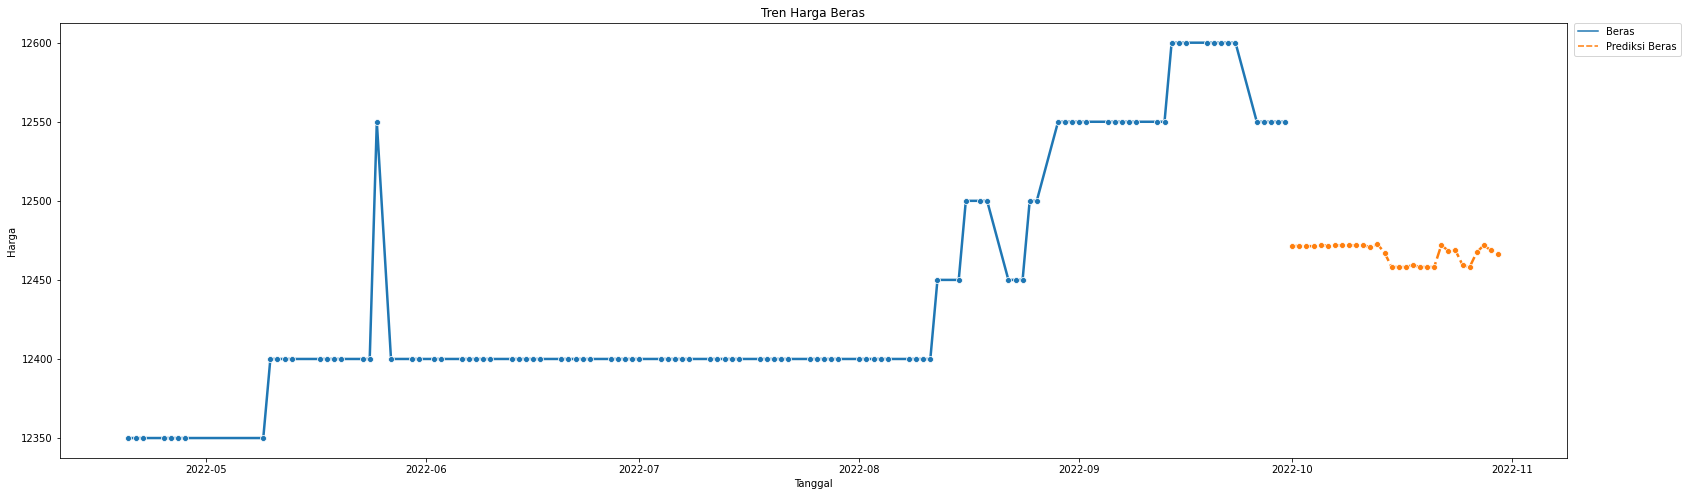

In [ ]:
plt.figure(figsize=(27, 8))
ax = sns.lineplot(data=df_pred, linewidth=2.5, marker="o", linestyle='solid')
ax.set(xlabel='Tanggal', ylabel='Harga', title='Tren Harga Beras')
ax.legend(title='Beras', title_fontsize = 13)
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

# Predict

### Prediksi Beras Kualitas Bawah 1 untuk 30 hari kedepan

In [ ]:
#Ambil 30 data terakhir
forecast_beras_kualitas_bawah_1 = test_beras_kualitas_bawah_1.iloc[-30:,0]

In [ ]:
#Lakukan Scaling
scaled_forecast_beras = scaler.fit_transform(forecast_beras_kualitas_bawah_1.values.reshape(-1,1))

In [ ]:
#Lakukan prediksi
test_pred_forecast = []

first_eval_batch = scaled_forecast_beras[-30:]
cur_batch = first_eval_batch.reshape(1,30,1)


for i in range(30):
    #Dapatkan Prediksi dari nilai pertama untuk tiap batch
    current_pred = model.predict(cur_batch)[0]

    #Append hasil prediksi ke array
    test_pred_forecast.append(current_pred)

    #Update nilai tiap batch
    cur_batch = np.append(cur_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 16ms/step


In [ ]:
prediction_forecast = scaler.inverse_transform(test_pred_forecast)
prediction_forecast = prediction_forecast.flatten()

In [ ]:
#Buat DataFrame Baru
date = pd.date_range(start='2022-10-01', periods=30)

temp_df = pd.DataFrame({
    "Prediksi Beras Kualitas Bawah 1" : prediction_forecast
}, index=date)


#Gabungkan Data
df_pred = pd.concat([test_beras_kualitas_bawah_1,temp_df])

df_pred

,Beras Kualitas Bawah I (kg),Prediksi Beras Kualitas Bawah 1
2022-04-20,11100.0,NaN
2022-04-21,11100.0,NaN
2022-04-22,11100.0,NaN
2022-04-25,11100.0,NaN
2022-04-26,11100.0,NaN
...,...,...
2022-10-26,NaN,11316.285613
2022-10-27,NaN,11339.275900
2022-10-28,NaN,11345.227252
2022-10-29,NaN,11340.474449


In [ ]:
test_beras_M = test_beras.resample('M').mean()

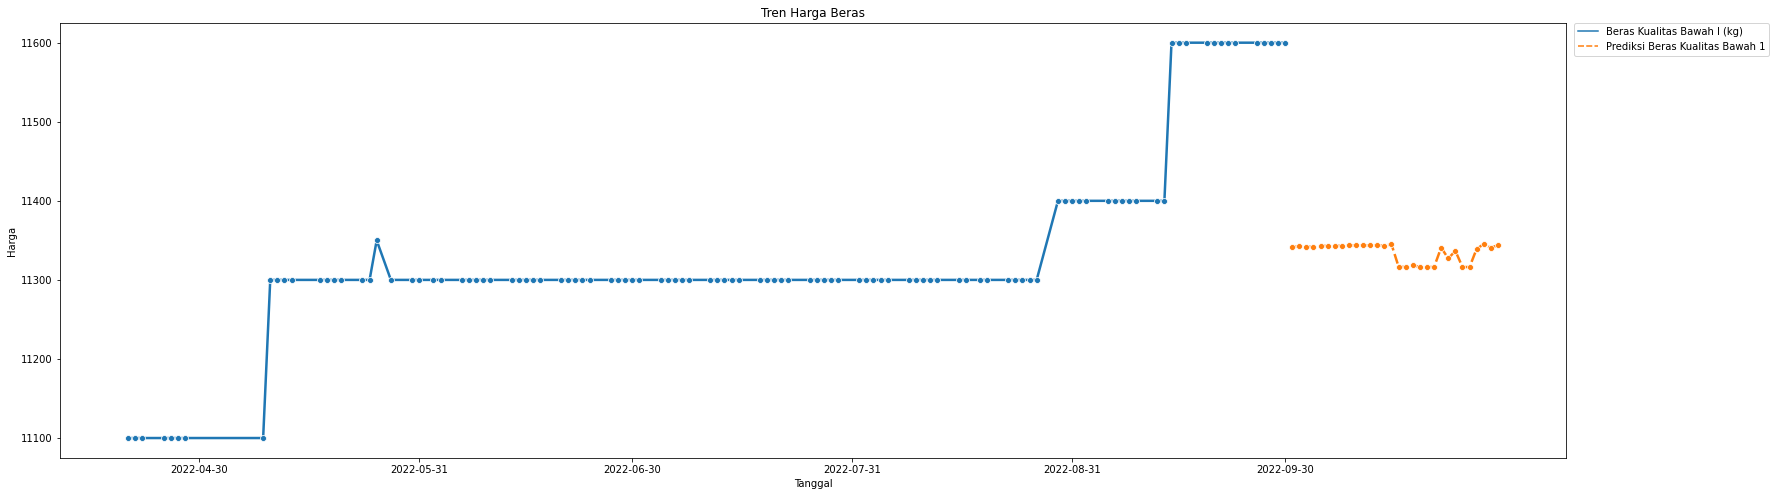

In [ ]:
plt.figure(figsize=(27, 8))
ax = sns.lineplot(data=df_pred, linewidth=2.5, marker="o", linestyle='solid')
ax.set(xlabel='Tanggal', ylabel='Harga', title='Tren Harga Beras', xticks=test_beras_M.index)
ax.legend(title='Beras', title_fontsize = 13)
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

### Prediksi Beras Kualitas Bawah 2 untuk 30 hari kedepan

In [ ]:
#Ambil 30 data terakhir
forecast_beras_kualitas_bawah_2 = test_beras_kualitas_bawah_2.iloc[-30:,0]

In [ ]:
#Lakukan Scaling
scaled_forecast_beras = scaler.fit_transform(forecast_beras_kualitas_bawah_2.values.reshape(-1,1))

In [ ]:
#Lakukan prediksi
test_pred_forecast = []

first_eval_batch = scaled_forecast_beras[-30:]
cur_batch = first_eval_batch.reshape(1,30,1)


for i in range(30):
    #Dapatkan Prediksi dari nilai pertama untuk tiap batch
    current_pred = model.predict(cur_batch)[0]

    #Append hasil prediksi ke array
    test_pred_forecast.append(current_pred)

    #Update nilai tiap batch
    cur_batch = np.append(cur_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 15ms/step


In [ ]:
prediction_forecast = scaler.inverse_transform(test_pred_forecast)
prediction_forecast = prediction_forecast.flatten()

In [ ]:
#Buat DataFrame Baru
date = pd.date_range(start='2022-10-01', periods=30)

temp_df = pd.DataFrame({
    "Prediksi Beras Kualitas Bawah 2" : prediction_forecast
}, index=date)


#Gabungkan Data
df_pred = pd.concat([test_beras_kualitas_bawah_2, temp_df])

df_pred

,Beras Kualitas Bawah II (kg),Prediksi Beras Kualitas Bawah 2
2022-04-20,11100.0,NaN
2022-04-21,11100.0,NaN
2022-04-22,11100.0,NaN
2022-04-25,11100.0,NaN
2022-04-26,11100.0,NaN
...,...,...
2022-10-26,NaN,11163.571344
2022-10-27,NaN,11182.502633
2022-10-28,NaN,11187.700370
2022-10-29,NaN,11183.564240


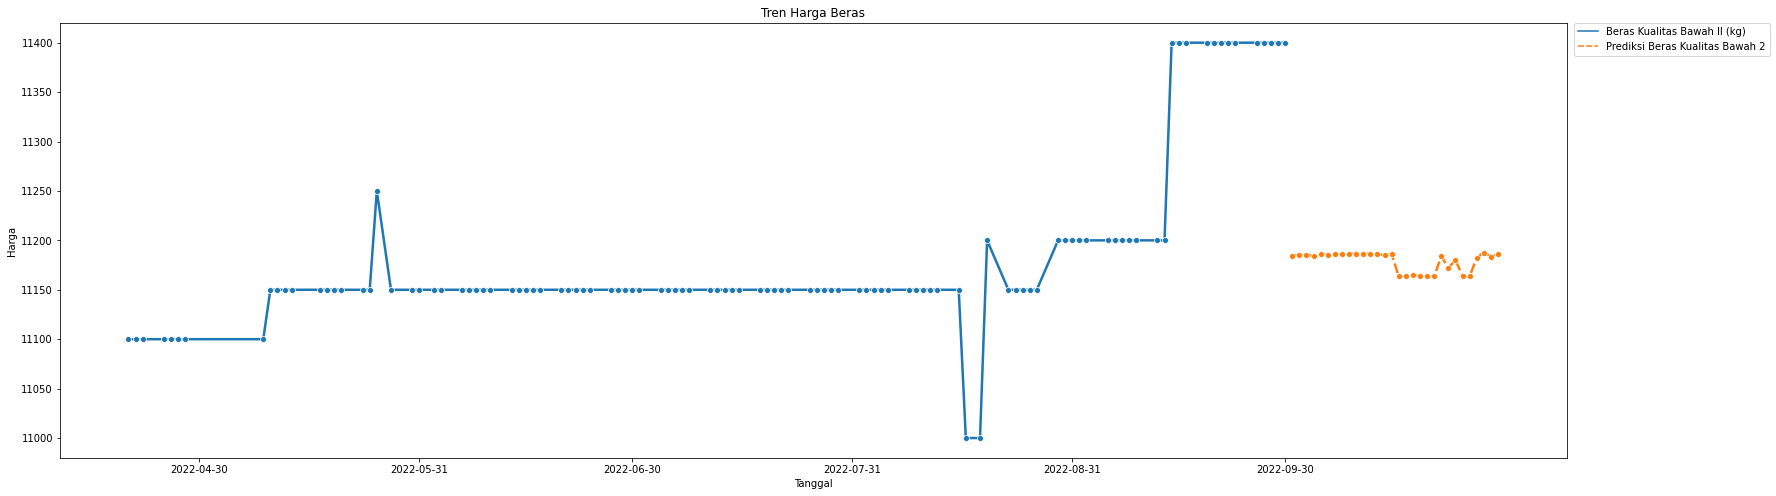

In [ ]:
plt.figure(figsize=(27, 8))
ax = sns.lineplot(data=df_pred, linewidth=2.5, marker="o", linestyle='solid')
ax.set(xlabel='Tanggal', ylabel='Harga', title='Tren Harga Beras', xticks=test_beras_M.index)
ax.legend(title='Beras', title_fontsize = 13)
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

### Prediksi Beras Kualitas Medium 1 untuk 30 hari kedepan

In [ ]:
#Ambil 30 data terakhir
forecast_beras_kualitas_medium_1 = test_beras_kualitas_medium_1.iloc[-30:,0]

In [ ]:
#Lakukan Scaling
scaled_forecast_beras = scaler.fit_transform(forecast_beras_kualitas_medium_1.values.reshape(-1,1))

In [ ]:
#Lakukan prediksi
test_pred_forecast = []

first_eval_batch = scaled_forecast_beras[-30:]
cur_batch = first_eval_batch.reshape(1,30,1)


for i in range(30):
    #Dapatkan Prediksi dari nilai pertama untuk tiap batch
    current_pred = model.predict(cur_batch)[0]

    #Append hasil prediksi ke array
    test_pred_forecast.append(current_pred)

    #Update nilai tiap batch
    cur_batch = np.append(cur_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 15ms/step


In [ ]:
prediction_forecast = scaler.inverse_transform(test_pred_forecast)
prediction_forecast = prediction_forecast.flatten()

In [ ]:
#Buat DataFrame Baru
date = pd.date_range(start='2022-10-01', periods=30)

temp_df = pd.DataFrame({
    "Prediksi Beras Kualitas Medium 1" : prediction_forecast
}, index=date)


#Gabungkan Data
df_pred = pd.concat([test_beras_kualitas_medium_1, temp_df])

df_pred

,Beras Kualitas Bawah I (kg),Prediksi Beras Kualitas Medium 1
2022-04-20,11100.0,NaN
2022-04-21,11100.0,NaN
2022-04-22,11100.0,NaN
2022-04-25,11100.0,NaN
2022-04-26,11100.0,NaN
...,...,...
2022-10-26,NaN,11316.285613
2022-10-27,NaN,11339.275900
2022-10-28,NaN,11345.227252
2022-10-29,NaN,11340.474449


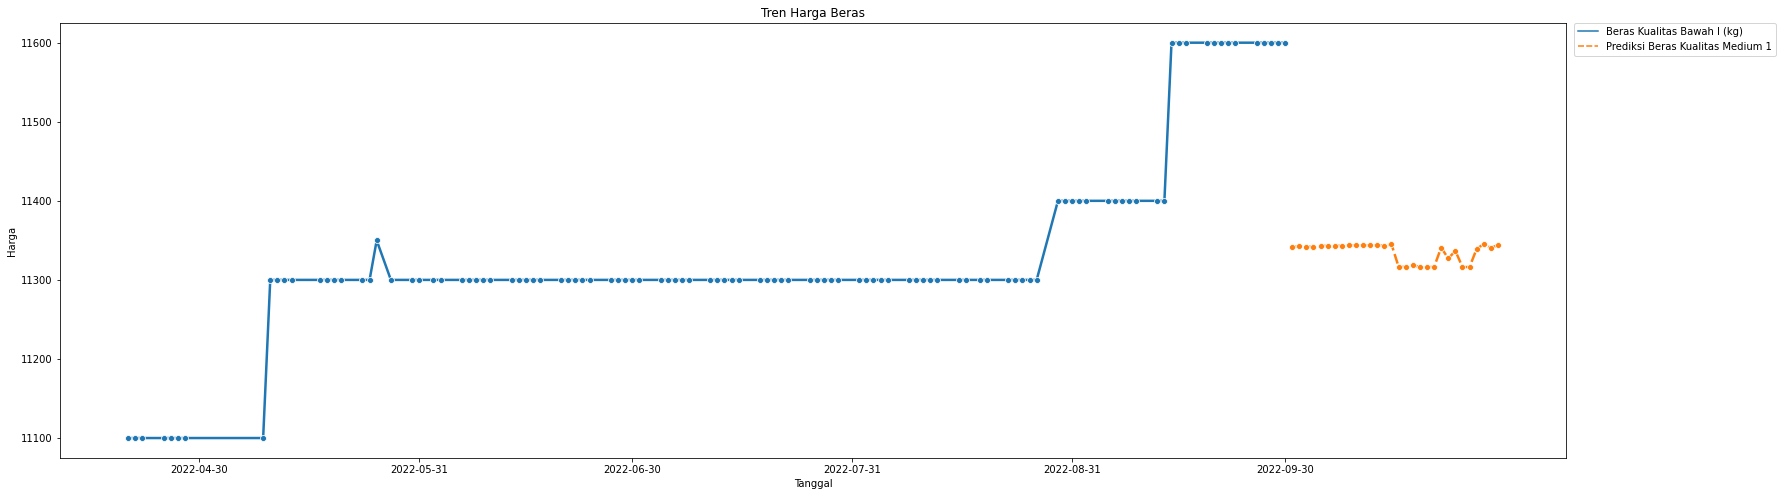

In [ ]:
plt.figure(figsize=(27, 8))
ax = sns.lineplot(data=df_pred, linewidth=2.5, marker="o", linestyle='solid')
ax.set(xlabel='Tanggal', ylabel='Harga', title='Tren Harga Beras', xticks=test_beras_M.index)
ax.legend(title='Beras', title_fontsize = 13)
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

### Prediksi Beras Kualitas Medium 2 untuk 30 hari kedepan

In [ ]:
#Ambil 30 data terakhir
forecast_beras_kualitas_medium_2 = test_beras_kualitas_medium_2.iloc[-30:,0]

In [ ]:
#Lakukan Scaling
scaled_forecast_beras = scaler.fit_transform(forecast_beras_kualitas_medium_2.values.reshape(-1,1))

In [ ]:
#Lakukan prediksi
test_pred_forecast = []

first_eval_batch = scaled_forecast_beras[-30:]
cur_batch = first_eval_batch.reshape(1,30,1)


for i in range(30):
    #Dapatkan Prediksi dari nilai pertama untuk tiap batch
    current_pred = model.predict(cur_batch)[0]

    #Append hasil prediksi ke array
    test_pred_forecast.append(current_pred)

    #Update nilai tiap batch
    cur_batch = np.append(cur_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [ ]:
prediction_forecast = scaler.inverse_transform(test_pred_forecast)
prediction_forecast = prediction_forecast.flatten()

In [ ]:
#Buat DataFrame Baru
date = pd.date_range(start='2022-10-01', periods=30)

temp_df = pd.DataFrame({
    "Prediksi Beras Kualitas Medium 2" : prediction_forecast
}, index=date)


#Gabungkan Data
df_pred = pd.concat([test_beras_kualitas_medium_2, temp_df])

df_pred

,Beras Kualitas Medium II (kg),Prediksi Beras Kualitas Medium 2
2022-04-20,12500.0,NaN
2022-04-21,12500.0,NaN
2022-04-22,12500.0,NaN
2022-04-25,12500.0,NaN
2022-04-26,12500.0,NaN
...,...,...
2022-10-26,NaN,12615.361288
2022-10-27,NaN,12632.764103
2022-10-28,NaN,12637.790701
2022-10-29,NaN,12631.398803


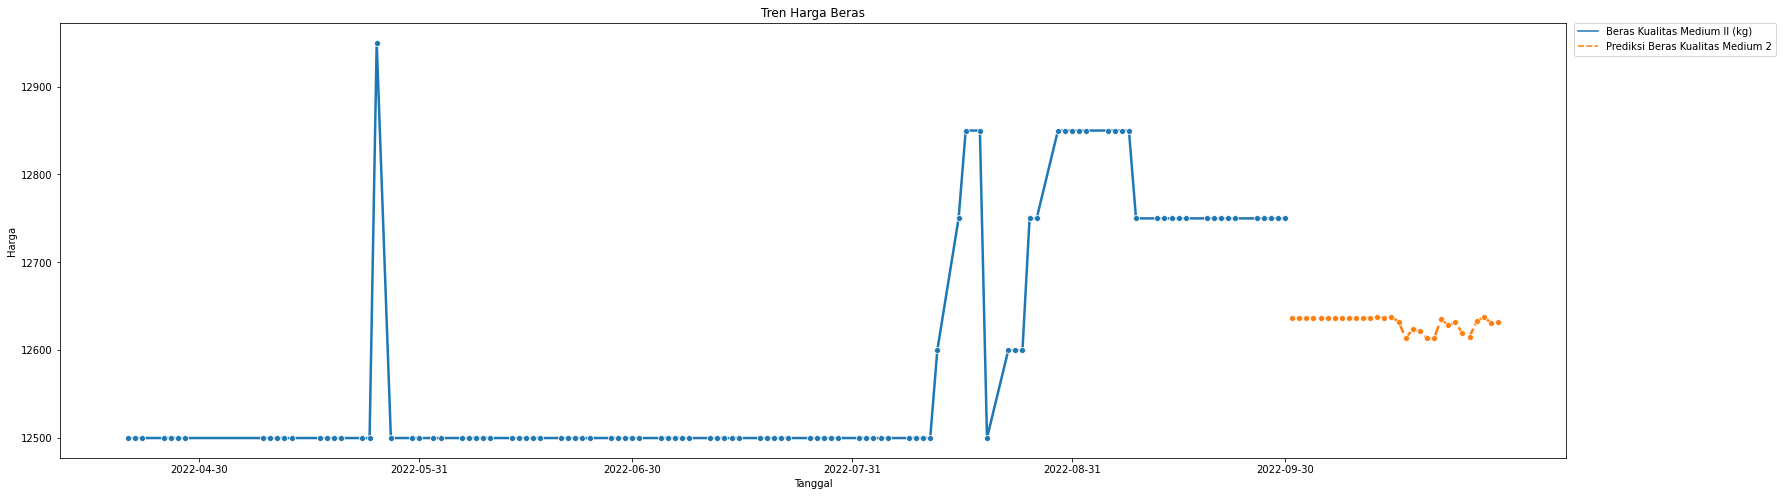

In [ ]:
plt.figure(figsize=(27, 8))
ax = sns.lineplot(data=df_pred, linewidth=2.5, marker="o", linestyle='solid')
ax.set(xlabel='Tanggal', ylabel='Harga', title='Tren Harga Beras', xticks=test_beras_M.index)
ax.legend(title='Beras', title_fontsize = 13)
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

### Prediksi Beras Kualitas Super 1 untuk 30 hari kedepan

In [ ]:
#Ambil 30 data terakhir
forecast_beras_kualitas_super_1 = test_beras_kualitas_super_1.iloc[-30:,0]

In [ ]:
#Lakukan Scaling
scaled_forecast_beras = scaler.fit_transform(forecast_beras_kualitas_super_1.values.reshape(-1,1))

In [ ]:
#Lakukan prediksi
test_pred_forecast = []

first_eval_batch = scaled_forecast_beras[-30:]
cur_batch = first_eval_batch.reshape(1,30,1)


for i in range(30):
    #Dapatkan Prediksi dari nilai pertama untuk tiap batch
    current_pred = model.predict(cur_batch)[0]

    #Append hasil prediksi ke array
    test_pred_forecast.append(current_pred)

    #Update nilai tiap batch
    cur_batch = np.append(cur_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 16ms/step


In [ ]:
prediction_forecast = scaler.inverse_transform(test_pred_forecast)
prediction_forecast = prediction_forecast.flatten()

In [ ]:
#Buat DataFrame Baru
date = pd.date_range(start='2022-10-01', periods=30)

temp_df = pd.DataFrame({
    "Prediksi Beras Kualitas Super 1" : prediction_forecast
}, index=date)


#Gabungkan Data
df_pred = pd.concat([test_beras_kualitas_super_1, temp_df])

df_pred

,Beras Kualitas Super I (kg),Prediksi Beras Kualitas Super 1
2022-04-20,13650.0,NaN
2022-04-21,13650.0,NaN
2022-04-22,13650.0,NaN
2022-04-25,13650.0,NaN
2022-04-26,13650.0,NaN
...,...,...
2022-10-26,NaN,13769.706491
2022-10-27,NaN,13760.593362
2022-10-28,NaN,13767.483564
2022-10-29,NaN,13768.468951


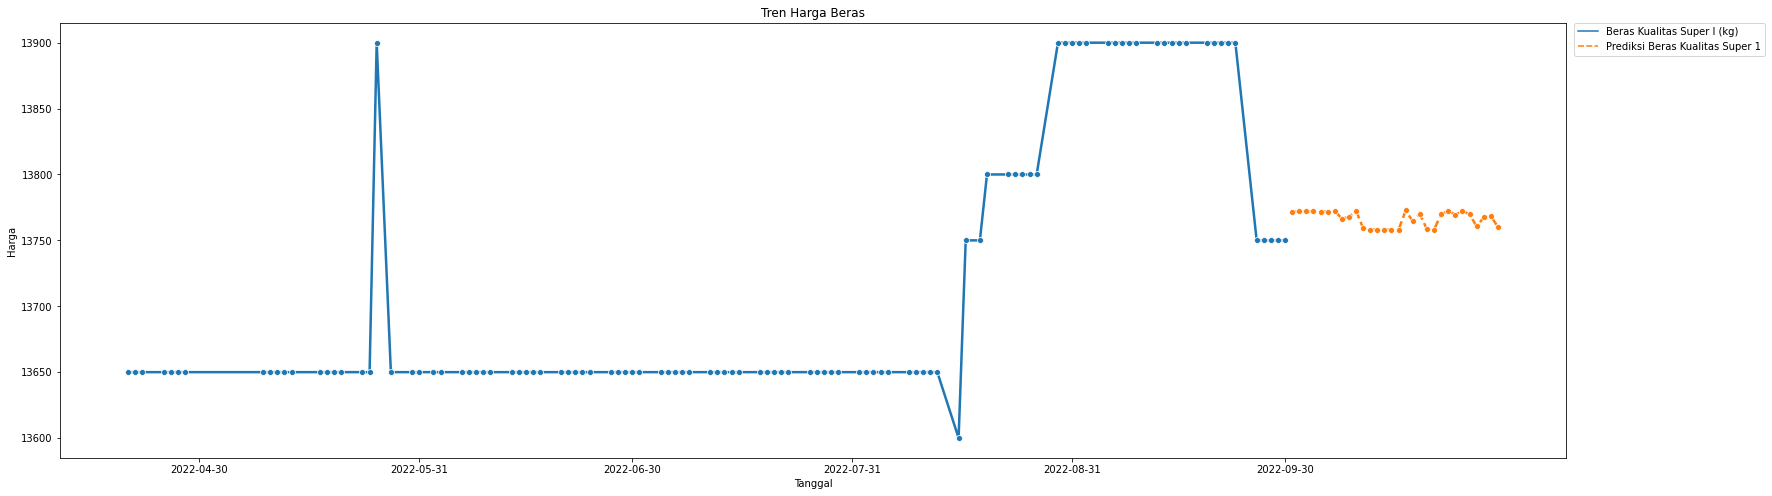

In [ ]:
plt.figure(figsize=(27, 8))
ax = sns.lineplot(data=df_pred, linewidth=2.5, marker="o", linestyle='solid')
ax.set(xlabel='Tanggal', ylabel='Harga', title='Tren Harga Beras', xticks=test_beras_M.index)
ax.legend(title='Beras', title_fontsize = 13)
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

### Prediksi Beras Kualitas Super 2 untuk 30 hari kedepan

In [ ]:
#Ambil 30 data terakhir
forecast_beras_kualitas_super_2 = test_beras_kualitas_super_2.iloc[-30:,0]

In [ ]:
#Lakukan Scaling
scaled_forecast_beras = scaler.fit_transform(forecast_beras_kualitas_super_2.values.reshape(-1,1))

In [ ]:
#Lakukan prediksi
test_pred_forecast = []

first_eval_batch = scaled_forecast_beras[-30:]
cur_batch = first_eval_batch.reshape(1,30,1)


for i in range(30):
    #Dapatkan Prediksi dari nilai pertama untuk tiap batch
    current_pred = model.predict(cur_batch)[0]

    #Append hasil prediksi ke array
    test_pred_forecast.append(current_pred)

    #Update nilai tiap batch
    cur_batch = np.append(cur_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 20ms/step


In [ ]:
prediction_forecast = scaler.inverse_transform(test_pred_forecast)
prediction_forecast = prediction_forecast.flatten()

In [ ]:
#Buat DataFrame Baru
date = pd.date_range(start='2022-10-01', periods=30)

temp_df = pd.DataFrame({
    "Prediksi Beras Kualitas Super 2" : prediction_forecast
}, index=date)


#Gabungkan Data
df_pred = pd.concat([test_beras_kualitas_super_2, temp_df])

df_pred

,Beras Kualitas Super II (kg),Prediksi Beras Kualitas Super 2
2022-04-20,13100.0,NaN
2022-04-21,13100.0,NaN
2022-04-22,13100.0,NaN
2022-04-25,13100.0,NaN
2022-04-26,13100.0,NaN
...,...,...
2022-10-26,NaN,12855.428538
2022-10-27,NaN,12863.433106
2022-10-28,NaN,12865.033947
2022-10-29,NaN,12863.310559


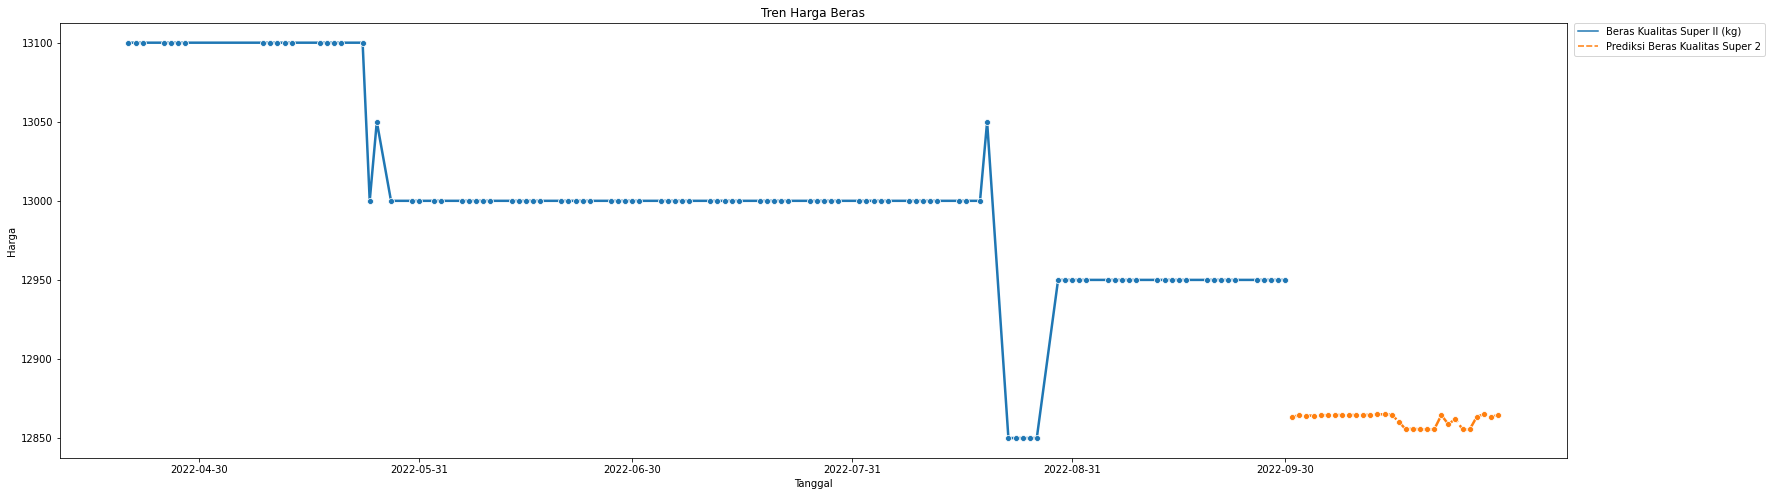

In [ ]:
plt.figure(figsize=(27, 8))
ax = sns.lineplot(data=df_pred, linewidth=2.5, marker="o", linestyle='solid')
ax.set(xlabel='Tanggal', ylabel='Harga', title='Tren Harga Beras', xticks=test_beras_M.index)
ax.legend(title='Beras', title_fontsize = 13)
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()